# Statistics - Correlation

- Week 1:  Maths and statistics
- Topic: Statistics
- Created by: Vaishnavi Khullar

Correlation allows us to calculate the bivariate analysis between 2 variables . The strength of the correlation varies between +1 and -1. The direction of the correlation coefficient helps to explain whether there is a positive or negative association between the 2 variables. 

The four most commonly used measures of correlation are:

1. Pearson correlation coefficient 
2. Spearman rank correlation coefficient 
3. Kendall Rank correlation coefficient 
4. Point-biserial correlation coefficient

#### Pearson correlation coefficient:

- Best used for continuous data where both variables are normally distributed
- It measures the linear relationship between 2 variables
- Values range from +1 to -1 and -1 indicates a perfect negative linear relationship
- It is sensitive to outliers, which can impact it's correlation value

$$ r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2}\sum{(y_i - \bar{y})^2}}} $$


- r is the pearson correlation coefficient 
- x_i and y_i are the individual sample points for the two variables
- x_bar and y_bar are the sample means
- the denominator is the product of the standard deviations of x and y 

In [4]:
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

In [5]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

<Axes: ylabel='Frequency'>

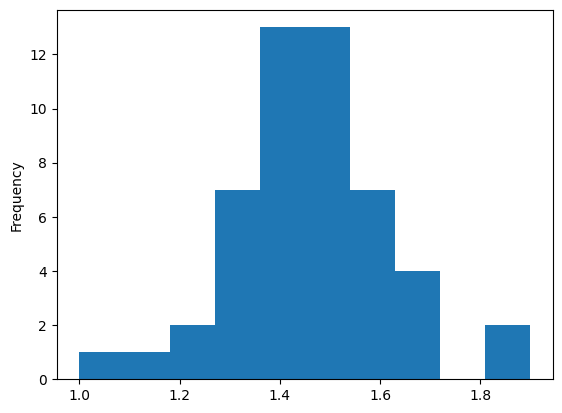

In [6]:
iris_df[iris_df['species']=='setosa']['petal length (cm)'].plot(kind='hist')

<Axes: ylabel='Frequency'>

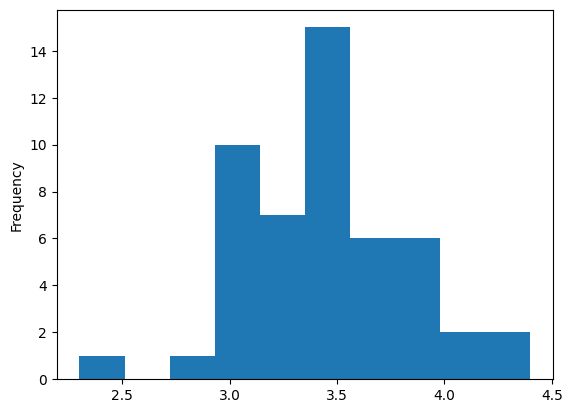

In [7]:
iris_df[iris_df['species']=='setosa']['sepal width (cm)'].plot(kind='hist')

Testing for a normal distribution: 

1. Draw a histogram 
2. Q-Q plot - plots the quantile of your data against the quantiles of the normal distribution

Statistical tests that can be done: 

1. Shapiro-Wilk Test (good for small sample sizes)
2. Kolmogorov-Smirnov Test (good for larger sample sizes)
3. Anderson-Darling Test
4. Lilliefors Test: A modification of the KS test

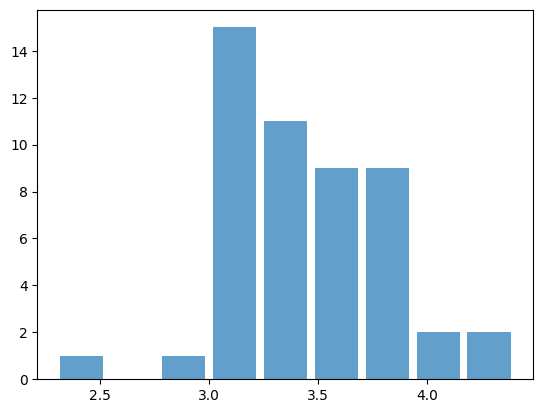

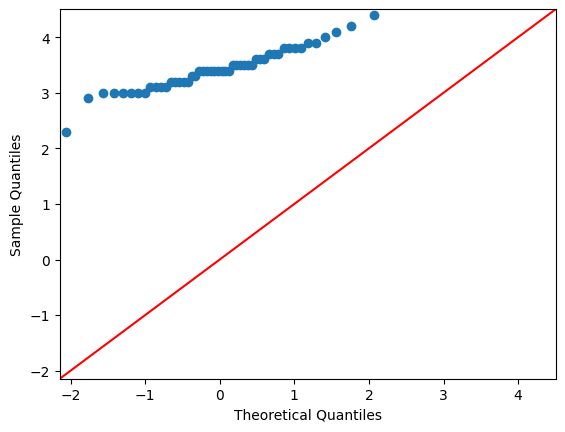

Shapiro-Wilk Test: Statistics=0.972, p=0.272


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# subset of the data
data = iris_df[iris_df['species']=='setosa']['sepal width (cm)']

# Histogram
plt.hist(data, bins='auto', alpha=0.7, rwidth=0.85)
plt.show()

# Q-Q plot
sm.qqplot(data, line ='45')
plt.show()

# Shapiro-Wilk Test
## The p value is greater than 0.05 and so the data follows a normal distribution 
stat, p = stats.shapiro(data)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))


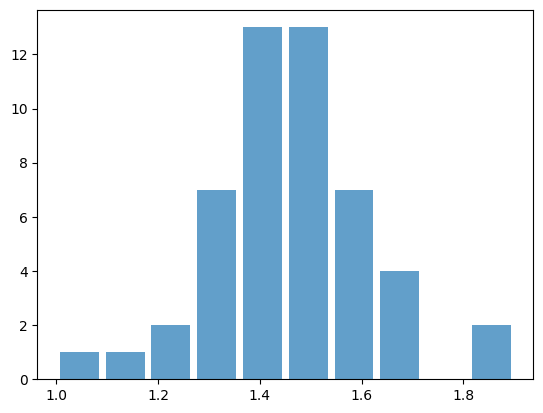

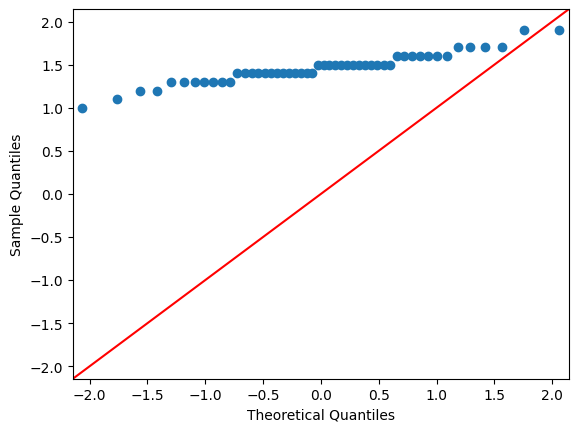

Shapiro-Wilk Test: Statistics=0.955, p=0.055


In [9]:
# subset of the data
data_ = iris_df[iris_df['species']=='setosa']['petal length (cm)']

# Histogram
plt.hist(data_, bins='auto', alpha=0.7, rwidth=0.85)
plt.show()

# Q-Q plot
sm.qqplot(data_, line ='45')
plt.show()

# Shapiro-Wilk Test
## The p value is greater than 0.05 and so the data follows a normal distribution 
stat, p = stats.shapiro(data_)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))


In [39]:
# calculating the pearson correlation between 2 variables:

correlation, p_value = stats.pearsonr(iris_df[iris_df['species']=='setosa']['sepal width (cm)'],iris_df[iris_df['species']=='setosa']['petal length (cm)'])
print(f'Pearson correlation coefficient: {correlation}, P-value: {p_value}')

Pearson correlation coefficient: 0.17769996678227068, P-value: 0.2169789241968609


- These results means that the correlation between sepal width and petal length is a week positive linear relationship.
- A p-value of 0.216 which is >> 0.05 suggests that the observed correlation is not statistically significant and so 
- What this means is that the evidence is not strong enough to conclude that the correlation in your samples exists in the popuation and that there is a greater than 5% chance that the observed correlations could have occured by chance.

### Pearson correlation coefficient and the coefficient of determination

- The pearson correlation coefficient measures the linear correlation between 2 variables
- The values range from +1 to -1 
- The sign of the indicates if the relationship is positive or negative


The coefficient of determination (R^2)

- It predicts the proportion of variance in the dependent varaible that is predicted from the independent variable
- The square of the correlation coefficient quantifies how much of the variation in one varaible is associated with the varaition in another variable
- R^2 is between 0 - 1


Example:

- Say you have 2 variables, X and Y
- The pearson correlation coefficient is r = 0.8
- Therefore the R^2 value is
- This means that 64% of the variance in Y is explained by the variance in X or vice versa 

### Understanding how a QQ plot works:

- Allows you to identify if the data follows a particular distribution sich as a normal, exponential or a poisson distributions

- It's not used for testing normality, but for comparing two distributions 
- It's useful because it's a non-parametric method
- https://www.youtube.com/watch?v=okjYjClSjOg